### crawling main

## xpath를 이용한 노드 찾기
### '/html/body/div/div[3]/ul/li[descendant::*[@class="imax"]]'
- li[조건] = 해당 조건을 만족하는 li 노드들
- *[@class="imax"] = 어떤 노드건 class속성이 imax인 노드들 (@가 속성을 뜻함)
- descendant::검색노드[조건] = 자식노드들 중에 조건을 만족하는 검색노드들

In [2]:
from collections import defaultdict
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import pickle
driver = webdriver.Chrome('./chromedriver.exe')
driver.get('https://www.slowand.com/')
time.sleep(3)

cloth_categories = {'TOP', 'SHIRT', 'KNIT', 'BOTTOM', 'OUTER', 'OPS/SK'}
cloth_dict = defaultdict(dict)

detail_cats_len = len(driver.find_elements(By.XPATH, '//*[@id="category"]/div/ul/li/a'))
for m in range(detail_cats_len):
    a_cat = driver.find_elements(By.XPATH, '//*[@id="category"]/div/ul/li/a')[m]
    cat_tmp = a_cat.text
    if not (cat_tmp in cloth_categories):
        continue
    a_cat.send_keys(Keys.ENTER) 
    time.sleep(3)
    
    detail_cats_len = len(driver.find_elements(By.XPATH, '//*[@id="contents"]/main/div[1]/div[3]/div[1]/ul/li/a'))
    for k in range(detail_cats_len):
        detail_cat = driver.find_elements(By.XPATH, '//*[@id="contents"]/main/div[1]/div[3]/div[1]/ul/li/a')[k]
        detail_cat_tmp = detail_cat.text
        cloth_dict[cat_tmp][detail_cat_tmp] = []
        detail_cat.send_keys(Keys.ENTER)
        time.sleep(3)

        detail_pages_len = len(driver.find_elements(By.XPATH, '//*[@id="contents"]/main/div[3]/ol/li/a'))
        for j in range(detail_pages_len):
            a_detail_page = driver.find_elements(By.XPATH, '//*[@id="contents"]/main/div[3]/ol/li/a')[j]
            a_detail_page.send_keys(Keys.ENTER)
            time.sleep(3)

            products_len = len(driver.find_elements(By.XPATH, '//*[@id="contents"]/main/div[2]/div/ul/li/div[1]/div[2]/a'))
            for i in range(products_len):
                a_product = driver.find_elements(By.XPATH, '//*[@id="contents"]/main/div[2]/div/ul/li/div[1]/div[2]/a')[i]
                a_product.send_keys(Keys.ENTER)
                time.sleep(5)
                try:
                    driver.switch_to.frame(driver.find_element(By.XPATH, '//*[@id="crema-fit-product-combined-detail-1"]'))
                except:
                    time.sleep(20)
                    driver.switch_to.frame(driver.find_element(By.XPATH, '//*[@id="crema-fit-product-combined-detail-1"]'))
                try:
                    spec = float(driver.find_elements(By.XPATH, '//*[@id="fit-product-size-section"]/div[2]/div/table/tbody/tr/td/span')[-1].get_attribute('innerText'))
                    print(spec)
                    cloth_dict[cat_tmp][detail_cat_tmp] += [spec]
                
                except:
                    print("data miss")
                    pass
                driver.back()
                time.sleep(3)

with open('cloth_dict.pickle', 'wb') as f:
    pickle.dump(cloth_dict, f)
print("success")

C:\Users\sinjy\AppData\Local\Temp\ipykernel_13108\2721380316.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


61.5
60.0
52.0
55.0
59.5
58.0
69.0
54.0
55.0
data miss
62.0
61.0
48.0
64.5
55.0
68.5
42.5
68.0
43.0
58.0
40.0
56.0
49.0
57.5
62.0
54.0
60.0
51.0
53.0
70.0
65.0
64.0
49.0
64.0
55.0
data miss
50.0
57.5
50.0
55.5
data miss
47.5
54.0
53.0
47.5
72.0
70.0
62.0
64.5
64.0
54.0
43.0
51.5
56.0
56.0
63.0
60.0
53.0
data miss
59.0
58.0
56.0
59.5
55.0
63.5
58.5
57.5
66.0
58.0
57.0
48.0
data miss
55.0
51.0
49.0
55.0
52.0
62.0
66.0
51.0
70.5
64.0
65.0
52.5
47.5
55.0
64.0
64.0
40.0
66.0
56.5
25.0
53.0
46.5
58.0
44.5
39.0
39.0
52.0
51.0
45.0
38.0
45.5
49.0
44.0
47.0
49.0
50.0
42.5
27.0
51.5
41.0
46.5
53.0
50.0
data miss
data miss
data miss
65.0
67.0
data miss
68.0
data miss
data miss
data miss
data miss
data miss
data miss
data miss
data miss
data miss
75.5
67.0
67.0
data miss
53.5
data miss
data miss
67.0
66.0
70.0
data miss
63.5
72.0
72.0
data miss
58.0
59.0
52.0
data miss
64.5
data miss
71.5
data miss
68.0
data miss
data miss
data miss
55.0
45.5
61.0
50.0
46.0
48.0
66.0
51.0
67.5
55.0
53.0
43.0
65.5


In [1]:
import pickle
with open('cloth_dict.pickle', 'rb') as f:
    cloth_dict = pickle.load(f)

C:\Users\sinjy\AppData\Local\Temp\ipykernel_10596\3465276120.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cloth_dict[cat][detail_cat], ax=ax, label=detail_cat, shade=True, palette='pastel').set(title=cat)
C:\Users\sinjy\AppData\Local\Temp\ipykernel_10596\3465276120.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(cloth_dict[cat][detail_cat], ax=ax, label=detail_cat, shade=True, palette='pastel').set(title=cat)
C:\Users\sinjy\AppData\Local\Temp\ipykernel_10596\3465276120.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cloth_dict[cat][detail_cat], ax=ax, label=detail_cat, shade=True, palette='pastel').set(title=cat)
C:\Users\sinjy\AppData\Local\Temp\ipykernel_10596\3465276120.py:10: 

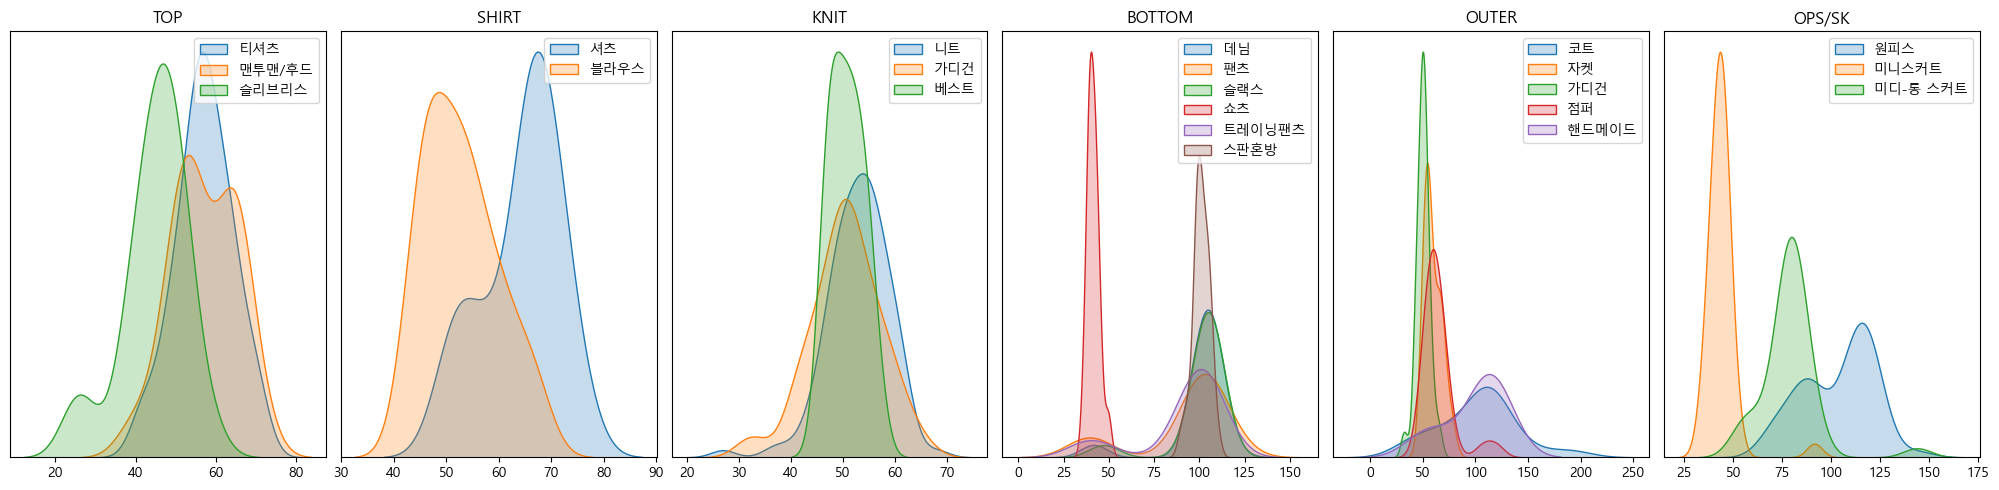

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
max_col = len(cloth_dict[max(cloth_dict, key=lambda x: len(cloth_dict[x]))])

fig, axes = plt.subplots(ncols=len(cloth_dict), figsize=(20,5))
for ax, cat in zip(axes, cloth_dict.keys()):
    for detail_cat in cloth_dict[cat].keys():
        # print(cat, detail_cat, ax)
        sns.kdeplot(cloth_dict[cat][detail_cat], ax=ax, label=detail_cat, shade=True, palette='pastel').set(title=cat)
    ax.yaxis.set_visible(False)
    ax.legend()
fig.tight_layout()
plt.show()